In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Load in all three datsets.

In [ ]:
degree_original = pd.read_csv("degrees-that-pay-back.csv")
degree_original.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [ ]:
college_original = pd.read_csv('salaries-by-college-type.csv')
college_original.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [ ]:
region_original = pd.read_csv("salaries-by-region.csv")
region_original.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [ ]:
#Take only the relevant columns of each dataset 
degree = degree_original[["Undergraduate Major", "Starting Median Salary"]]
college = college_original[["School Name" , "School Type", "Starting Median Salary"]]
region = region_original[["School Name", "Region", "Starting Median Salary"]]

In [ ]:
#Merge college and region data based on school name
#Used inner so only captures overlapping school names 
merge = pd.merge(college, region, how='inner')
merge = merge[["School Name", "Region", "School Type", "Starting Median Salary"]]
merge

,School Name,Region,School Type,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,"$72,200.00"
1,California Institute of Technology (CIT),California,Engineering,"$75,500.00"
2,Harvey Mudd College,California,Engineering,"$71,800.00"
3,"Polytechnic University of New York, Brooklyn",Northeastern,Engineering,"$62,400.00"
4,Cooper Union,Northeastern,Engineering,"$62,200.00"
...,...,...,...,...
263,Austin Peay State University,Southern,State,"$37,700.00"
264,Pittsburg State University,Midwestern,State,"$40,400.00"
265,Southern Utah University,Western,State,"$41,900.00"
266,Montana State University - Billings,Western,State,"$37,900.00"


In [ ]:
#Cast Starting Median Salary as Integer

degree["Starting Median Salary"] = degree["Starting Median Salary"].str.replace("$", "").str.replace(",","").str.strip("0").str.replace(".","").astype('int64')
merge["Starting Median Salary"] = merge["Starting Median Salary"].str.replace("$", "").str.replace(",","").str.strip("0").str.replace(".","").astype('int64')
merge["Starting Median Salary"]

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      72200
1      75500
2      71800
3      62400
4      62200
       ...  
263    37700
264    40400
265    41900
266    37900
267    35300
Name: Starting Median Salary, Length: 268, dtype: int64

In [ ]:
#Find mean of Starting Median Salary
salary_mean = merge["Starting Median Salary"].mean()
salary_mean

46043.65671641791

In [ ]:
#Add new column with percent difference from salary mean 
merge["Percent Salary"] = (merge["Starting Median Salary"] - salary_mean)/salary_mean
merge


,School Name,Region,School Type,Starting Median Salary,Percent Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,72200,0.568077
1,California Institute of Technology (CIT),California,Engineering,75500,0.639748
2,Harvey Mudd College,California,Engineering,71800,0.559390
3,"Polytechnic University of New York, Brooklyn",Northeastern,Engineering,62400,0.355236
4,Cooper Union,Northeastern,Engineering,62200,0.350892
...,...,...,...,...,...
263,Austin Peay State University,Southern,State,37700,-0.181212
264,Pittsburg State University,Midwestern,State,40400,-0.122572
265,Southern Utah University,Western,State,41900,-0.089994
266,Montana State University - Billings,Western,State,37900,-0.176868


In [ ]:
#No longer need salary column, also will be confusing later because salary column in degree dataset also called Starting Median Salary
merge = merge.drop(["Starting Median Salary"], axis=1)
merge

,School Name,Region,School Type,Percent Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
1,California Institute of Technology (CIT),California,Engineering,0.639748
2,Harvey Mudd College,California,Engineering,0.559390
3,"Polytechnic University of New York, Brooklyn",Northeastern,Engineering,0.355236
4,Cooper Union,Northeastern,Engineering,0.350892
...,...,...,...,...
263,Austin Peay State University,Southern,State,-0.181212
264,Pittsburg State University,Midwestern,State,-0.122572
265,Southern Utah University,Western,State,-0.089994
266,Montana State University - Billings,Western,State,-0.176868


In [ ]:
#Duplicated 50 rows per school in merge dataframe
merge_new = pd.DataFrame(np.repeat(merge.values,50,axis=0))
merge_new.columns = merge.columns 
merge_new

,School Name,Region,School Type,Percent Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077
...,...,...,...,...
13395,Black Hills State University,Midwestern,State,-0.233336
13396,Black Hills State University,Midwestern,State,-0.233336
13397,Black Hills State University,Midwestern,State,-0.233336
13398,Black Hills State University,Midwestern,State,-0.233336


In [ ]:
#Duplicated 267 sets of majors 
degree_new = pd.concat([degree]*268, ignore_index=True)
degree_new

,Undergraduate Major,Starting Median Salary
0,Accounting,46000
1,Aerospace Engineering,57700
2,Agriculture,42600
3,Anthropology,36800
4,Architecture,41600
...,...,...
13395,Political Science,40800
13396,Psychology,35900
13397,Religion,34100
13398,Sociology,36500


In [ ]:
#Combine the two big datasets 
degree_merge = pd.concat([merge_new, degree_new], axis=1)
degree_merge

,School Name,Region,School Type,Percent Salary,Undergraduate Major,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Accounting,46000
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Aerospace Engineering,57700
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Agriculture,42600
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Anthropology,36800
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,0.568077,Architecture,41600
...,...,...,...,...,...,...
13395,Black Hills State University,Midwestern,State,-0.233336,Political Science,40800
13396,Black Hills State University,Midwestern,State,-0.233336,Psychology,35900
13397,Black Hills State University,Midwestern,State,-0.233336,Religion,34100
13398,Black Hills State University,Midwestern,State,-0.233336,Sociology,36500


In [ ]:
#Adding a new column with adjusted salary based on the school
degree_merge["Adjusted Salary"] = degree_merge["Starting Median Salary"] + (salary_mean * degree_merge["Percent Salary"])
degree_merge = degree_merge.drop(["Starting Median Salary", "Percent Salary"], axis=1)
degree_merge["Adjusted Salary"] = degree_merge["Adjusted Salary"].astype('int64') 
degree_merge

,School Name,Region,School Type,Undergraduate Major,Adjusted Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Accounting,72156
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Aerospace Engineering,83856
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Agriculture,68756
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Anthropology,62956
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Architecture,67756
...,...,...,...,...,...
13395,Black Hills State University,Midwestern,State,Political Science,30056
13396,Black Hills State University,Midwestern,State,Psychology,25156
13397,Black Hills State University,Midwestern,State,Religion,23356
13398,Black Hills State University,Midwestern,State,Sociology,25756


In [ ]:
degree_merge.sort_values("Adjusted Salary", ascending=True).head()

,School Name,Region,School Type,Undergraduate Major,Adjusted Salary
13149,Morehead State University,Southern,State,Spanish,22756
13147,Morehead State University,Southern,State,Religion,22856
13399,Black Hills State University,Midwestern,State,Spanish,23256
13397,Black Hills State University,Midwestern,State,Religion,23356
13118,Morehead State University,Southern,State,Education,23656


In [ ]:
degree_merge.sort_values("Adjusted Salary", ascending=False).head()

,School Name,Region,School Type,Undergraduate Major,Adjusted Salary
93,California Institute of Technology (CIT),California,Engineering,Physician Assistant,103756
43,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Physician Assistant,100456
143,Harvey Mudd College,California,Engineering,Physician Assistant,100056
5293,Princeton University,Northeastern,Ivy League,Physician Assistant,94756
58,California Institute of Technology (CIT),California,Engineering,Chemical Engineering,92656


These adjusted salaries seem pretty believable to me, although I haven't checked any of them. 

In [ ]:
#Before binning the incomes quickly running a linear regression model to see impact of adding major  

#Split into train and test set
X = degree_merge[["School Name", "Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Adjusted Salary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

#Linear Regression Model
reg = LinearRegression().fit(enc_train, y_train)
reg.score(enc_train, y_train)

1.0

In [ ]:
y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 1.9660017560861672e-11
MSE: 6.525837734078796e-22
RMSE: 2.5545719277559588e-11
R2 Score: 1.0


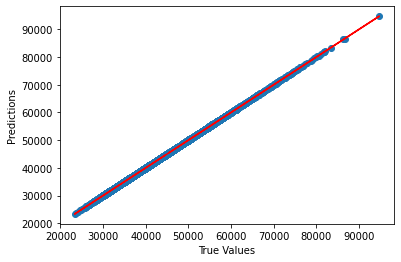

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')

In [ ]:
#Created a new cell to test out a different variant of the linear regression excluding college since if you had a student from a college not already in this dataset, I want to see how useful the model will be
#Split into train and test set
X = degree_merge[["Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Adjusted Salary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

#Linear Regression Model
reg = LinearRegression().fit(enc_train, y_train)
reg.score(enc_train, y_train)

0.8627924205561461

In [ ]:
y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 3149.2309701492536
MSE: 16835693.48488806
RMSE: 4103.132155425665
R2 Score: 0.8659573054699967


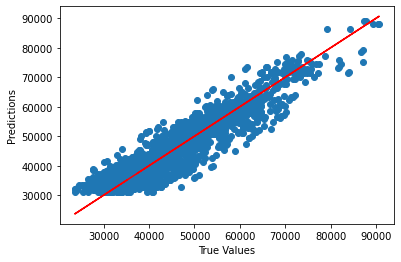

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')

In [ ]:
#Running same model without school like above, but now with cross validation
# create a KFold object with 5 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(reg, enc_train, y_train, scoring='r2', cv=folds)
scores  


array([0.86105732, 0.87401809, 0.85781361, 0.85966189, 0.87397766,
       0.85560097, 0.85806508, 0.8606602 , 0.85890751, 0.8494729 ])

Model didn't really perform much differently across the different folds

In [ ]:
r2_model = []
splits = []
for train_index, test_index in folds.split(enc_train):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    enc = OneHotEncoder()
    enc.fit(X)
    enc_train = enc.transform(X_train).toarray()
    enc_test = enc.transform(X_test).toarray()
    # Train the model
    model = LinearRegression().fit(enc_train, y_train)
    r2_model.append(model.score(enc_test, y_test))
    splits.append([enc_train, y_train, enc_test, y_test])

# Print the accuracy    
print(r2_model)

[0.8783062274894051, 0.8687193962999511, 0.8754126708670846, 0.8767165461136663, 0.8747527576523545, 0.8703278530671344, 0.8800080505501149, 0.8554751774629127, 0.8839614056425752, 0.8633251359304921]


In [ ]:
#Used highest scoring split to set training and test set 
max_score_index = r2_model.index(max(r2_model))
enc_train = splits[max_score_index][0]
y_train = splits[max_score_index][1]
enc_test = splits[max_score_index][2]
y_test = splits[max_score_index][3]

#Linear Regression Model
reg = LinearRegression().fit(enc_train, y_train)
print(reg.score(enc_train, y_train))

y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

0.8725451597016661
MAE: 3067.3097014925374
MSE: 15413262.432835821
RMSE: 3925.9728008273087
R2 Score: 0.8839614056425752


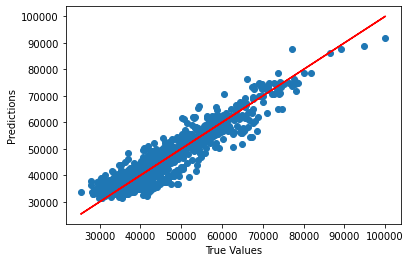

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')

In [ ]:
degree_merge.to_csv('merged.csv', index = True)

In [ ]:
test_pred = np.array([["Northeastern", "Engineering", "Electrical Engineering"]])
test_df = pd.DataFrame(data = test_pred,  index = ["0"],  columns = ["Region","School Type", "Undergraduate Major"]) 
print(test_df)

         Region  School Type     Undergraduate Major
0  Northeastern  Engineering  Electrical Engineering


In [ ]:
enc_test2 = enc.transform(test_df).toarray()
y_pred2 = reg.predict(enc_test2)
print(y_pred2)

[[73856.]]


In [ ]:
filtered_df = degree_merge[degree_merge['Region'] == "Northeastern"]
filtered_df

,School Name,Region,School Type,Undergraduate Major,Adjusted Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Accounting,72156
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Aerospace Engineering,83856
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Agriculture,68756
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Anthropology,62956
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Architecture,67756
...,...,...,...,...,...
12895,University of Southern Maine,Northeastern,State,Political Science,34156
12896,University of Southern Maine,Northeastern,State,Psychology,29256
12897,University of Southern Maine,Northeastern,State,Religion,27456
12898,University of Southern Maine,Northeastern,State,Sociology,29856


In [ ]:
filtered_df = filtered_df[filtered_df["School Type"] == "Engineering"]
filtered_df = filtered_df[filtered_df["Undergraduate Major"] == "Electrical Engineering"]
print(filtered_df)

                                      School Name        Region  School Type  \
19    Massachusetts Institute of Technology (MIT)  Northeastern  Engineering   
169  Polytechnic University of New York, Brooklyn  Northeastern  Engineering   
219                                  Cooper Union  Northeastern  Engineering   
269         Worcester Polytechnic Institute (WPI)  Northeastern  Engineering   
319              Carnegie Mellon University (CMU)  Northeastern  Engineering   
369        Rensselaer Polytechnic Institute (RPI)  Northeastern  Engineering   
519               Stevens Institute of Technology  Northeastern  Engineering   
619             Wentworth Institute of Technology  Northeastern  Engineering   
819       Rochester Institute of Technology (RIT)  Northeastern  Engineering   

        Undergraduate Major  Adjusted Salary  
19   Electrical Engineering            87056  
169  Electrical Engineering            77256  
219  Electrical Engineering            77056  
269  Electr

In [ ]:
filtered_mean = filtered_df["Adjusted Salary"].mean()
print(filtered_mean)

75211.55555555556


In [ ]:
print("Percent Difference:", (y_pred2.item() - filtered_mean.item())/filtered_mean.item())

Percent Difference: -0.01802323520026482


In [ ]:
#Lets try binning the values
max = degree_merge["Adjusted Salary"].max()
min = degree_merge["Adjusted Salary"].min()
print("Max:", max)
print("Min:", min)

Max: 103756
Min: 22756


In [ ]:
std1 = degree_merge["Adjusted Salary"].std()
print('std: ' + str(std1))
quantile1 = degree_merge["Adjusted Salary"].quantile(q=0.25)
print('25%: ' + str(quantile1))
quantile2 = degree_merge["Adjusted Salary"].quantile(q=0.50)
print('50%: ' + str(quantile2))
quantile3 = degree_merge["Adjusted Salary"].quantile(q=0.75)
print('75%: ' + str(quantile3))


std: 11262.313395753694
25%: 35656.0
50%: 41656.0
75%: 51456.0


In [ ]:
#Based on the standard deviation shown above, I guess it makes sense to create bins of $5,000 from $20,000 USD to $110,000 USD
degree_merge["Salary Range"] = pd.cut(degree_merge["Adjusted Salary"], bins = np.arange(20000, 115000, 5000))

In [ ]:
degree_merge

,School Name,Region,School Type,Undergraduate Major,Adjusted Salary,Salary Range
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Accounting,72156,"(70000, 75000]"
1,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Aerospace Engineering,83856,"(80000, 85000]"
2,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Agriculture,68756,"(65000, 70000]"
3,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Anthropology,62956,"(60000, 65000]"
4,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,Architecture,67756,"(65000, 70000]"
...,...,...,...,...,...,...
13395,Black Hills State University,Midwestern,State,Political Science,30056,"(30000, 35000]"
13396,Black Hills State University,Midwestern,State,Psychology,25156,"(25000, 30000]"
13397,Black Hills State University,Midwestern,State,Religion,23356,"(20000, 25000]"
13398,Black Hills State University,Midwestern,State,Sociology,25756,"(25000, 30000]"


In [ ]:
#Implementing a Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Split into train and test set
X = degree_merge[["School Name", "Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Salary Range"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_x_train = enc.transform(X_train).toarray()
enc_x_test = enc.transform(X_test).toarray()

enc2 = OneHotEncoder()
enc2.fit(y)

enc_y_train = enc2.transform(y_train).toarray()
enc_y_test = enc2.transform(y_test).toarray()

In [ ]:
model = RandomForestClassifier(n_estimators = 10)
random_forest = model.fit(enc_x_train, enc_y_train)

In [ ]:
y_pred = random_forest.predict(enc_x_test)

In [ ]:
print("MAE:" , metrics.mean_absolute_error(enc_y_test, y_pred))
print("MSE:", metrics.mean_squared_error(enc_y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(enc_y_test, y_pred)))

MAE: 0.0576259328358209
MSE: 0.0576259328358209
RMSE: 0.2400540206616438


In [ ]:
#Split into train and test set
X = degree_merge[["Region", "School Type", "Undergraduate Major"]]
y = degree_merge[["Salary Range"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_x_train = enc.transform(X_train).toarray()
enc_x_test = enc.transform(X_test).toarray()

enc2 = OneHotEncoder()
enc2.fit(y)

enc_y_train = enc2.transform(y_train).toarray()
enc_y_test = enc2.transform(y_test).toarray()

In [ ]:
model = RandomForestClassifier(n_estimators = 50)
random_forest = model.fit(enc_x_train, enc_y_train)

In [ ]:
y_pred = random_forest.predict(enc_x_test)

In [ ]:
print("MAE:" , metrics.mean_absolute_error(enc_y_test, y_pred))
print("MSE:", metrics.mean_squared_error(enc_y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(enc_y_test, y_pred)))

MAE: 0.06658115671641791
MSE: 0.06658115671641791
RMSE: 0.2580332473082062
